## **Convolutional Neural Network**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [2]:
import numpy as np
import cv2, os, random, pickle
import matplotlib.pyplot as plt

In [3]:
DIRECTORY = r'training_set/'
CATEGORIES = ['cat', 'dog']

In [4]:
# checking if datasets location is properly stated and accessible
for category in CATEGORIES:
  datasets = os.path.join(DIRECTORY, category)
  print(datasets)

training_set/cat
training_set/dog


In [5]:
# checking the accessibility of the datasets
for category in CATEGORIES:
  datasets = os.path.join(DIRECTORY, category)
  for img in os.listdir(datasets):
    img_path = os.path.join(datasets, img)
    print(img_path)

training_set/cat/cat.201.jpg
training_set/cat/cat.202.jpg
training_set/cat/cat.203.jpg
training_set/cat/cat.205.jpg
training_set/cat/cat.204.jpg
training_set/cat/cat.206.jpg
training_set/cat/cat.207.jpg
training_set/cat/cat.208.jpg
training_set/cat/cat.209.jpg
training_set/cat/cat.210.jpg
training_set/cat/cat.211.jpg
training_set/cat/cat.212.jpg
training_set/cat/cat.214.jpg
training_set/cat/cat.213.jpg
training_set/cat/cat.215.jpg
training_set/cat/cat.216.jpg
training_set/cat/cat.217.jpg
training_set/cat/cat.219.jpg
training_set/cat/cat.218.jpg
training_set/cat/cat.220.jpg
training_set/cat/cat.221.jpg
training_set/cat/cat.222.jpg
training_set/cat/cat.223.jpg
training_set/cat/cat.224.jpg
training_set/cat/cat.225.jpg
training_set/cat/cat.226.jpg
training_set/cat/cat.227.jpg
training_set/cat/cat.228.jpg
training_set/cat/cat.229.jpg
training_set/cat/cat.230.jpg
training_set/cat/cat.231.jpg
training_set/cat/cat.232.jpg
training_set/cat/cat.234.jpg
training_set/cat/cat.233.jpg
training_set/c

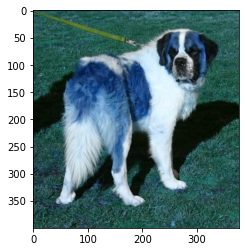

In [6]:
# accessing a sample datasets stored in a folder in the GDrive
for category in CATEGORIES:
  datasets = os.path.join(DIRECTORY, category)
  for img in os.listdir(datasets):
    img_path = os.path.join(datasets, img)
    img_arr = cv2.imread(img_path)
    plt.imshow(img_arr)

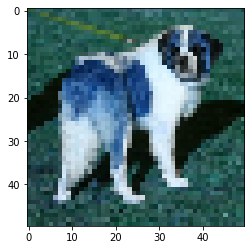

In [7]:
# Resizing images using cv2
IMG_SIZE = 50

for category in CATEGORIES:
  datasets = os.path.join(DIRECTORY, category)
  for img in os.listdir(datasets):
    img_path = os.path.join(datasets, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_arr)

In [ ]:
# storing imaage to an array

data = []

for category in CATEGORIES:
  datasets = os.path.join(DIRECTORY, category)
  label = CATEGORIES.index(category)

  for img in os.listdir(datasets):
    img_path = os.path.join(datasets, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    data.append([img_arr, label])

In [ ]:
# length of the object (data)
len(data)

In [ ]:
# arranging the datasets in shuffle
random.shuffle(data)

In [ ]:
# pixel values
data[0]

In [ ]:
# append all the x values as features and the y values as labels
X = []
y = []

for features, labels in data:
  X.append(features)
  y.append(labels)

In [ ]:
# store the data into assigned variables
X = np.array(X)
y = np.array(y)

In [ ]:
# dump the x variable to write the bytes
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [ ]:
# load the X, y variable to be readable
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [ ]:
# display the x var
X

In [ ]:
# datasets label for y = 0 cat 1 dog
y

In [ ]:
# normalize the data
X = X/255

In [ ]:
X

In [ ]:
X.shape

### **Building the CNN model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X, y, epochs = 10, validation_split = 0.1)

Epoch 1/10
17/17 [==============================] - 4s 161ms/step - loss: 0.6981 - accuracy: 0.5389 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 2/10
17/17 [==============================] - 2s 146ms/step - loss: 0.6607 - accuracy: 0.6130 - val_loss: 0.8753 - val_accuracy: 0.5000
Epoch 3/10
17/17 [==============================] - 2s 143ms/step - loss: 0.6755 - accuracy: 0.6148 - val_loss: 0.6591 - val_accuracy: 0.6333
Epoch 4/10
17/17 [==============================] - 2s 143ms/step - loss: 0.5700 - accuracy: 0.7185 - val_loss: 0.7000 - val_accuracy: 0.5500
Epoch 5/10
17/17 [==============================] - 2s 142ms/step - loss: 0.4788 - accuracy: 0.7630 - val_loss: 0.6855 - val_accuracy: 0.6833
Epoch 6/10
17/17 [==============================] - 2s 141ms/step - loss: 0.3936 - accuracy: 0.8185 - val_loss: 0.6003 - val_accuracy: 0.8000
Epoch 7/10
17/17 [==============================] - 2s 142ms/step - loss: 0.2945 - accuracy: 0.8759 - val_loss: 0.6635 - val_accuracy: 0.7667
Epoch 

Another CNN Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_set = train_datagen.flow_from_directory(directory=DIRECTORY, target_size=(128,128),batch_size=32, color_mode="rgb", class_mode = 'binary')
test_set = train_datagen.flow_from_directory(directory=DIRECTORY, target_size=(128,128), batch_size=30, color_mode="rgb", class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 16)       

In [ ]:
hist = model.fit(train_set, validation_data = test_set, epochs = 10, validation_split = 0.1)

Epoch 1/10
19/19 [==============================] - 38s 2s/step - loss: 0.8219 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
19/19 [==============================] - 35s 2s/step - loss: 0.7048 - accuracy: 0.5167 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 3/10
19/19 [==============================] - 35s 2s/step - loss: 0.6938 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
19/19 [==============================] - 34s 2s/step - loss: 0.6964 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5017
Epoch 5/10
19/19 [==============================] - 35s 2s/step - loss: 0.7073 - accuracy: 0.5300 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/10
19/19 [==============================] - 34s 2s/step - loss: 0.6949 - accuracy: 0.4900 - val_loss: 0.6918 - val_accuracy: 0.5167
Epoch 7/10
19/19 [==============================] - 34s 2s/step - loss: 0.7035 - accuracy: 0.4817 - val_loss: 0.6896 - val_accuracy: 0.5500
Epoch 8/10
19/19 [==